In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import math
import smtplib

from sklearn.metrics import mean_squared_error
# load dataset
from pandas import read_csv

from sklearn.model_selection import train_test_split


from datetime import datetime
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing

from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
'''
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information
'''

In [2]:
gps_user_rev = pd.read_csv('googleplaystore_user_reviews.csv')
gps = pd.read_csv('googleplaystore.csv')

In [3]:
gps_user_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exploratory Analysis

In [ ]:
'''
gps_user_rev tab
'''

In [5]:
gps_user_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


We are intrested by the sentiment (Positif, Negatif) in the reviews therefore we can drop the Translated_Review column

In [6]:
#Drop Translated_Review column
gps_user_rev = gps_user_rev.drop(['Translated_Review'], axis=1)

#distinct elements in each row
print('distinct elements in each column:',gps_user_rev.nunique())


distinct elements in each column: App                       1074
Sentiment                    3
Sentiment_Polarity        5410
Sentiment_Subjectivity    4474
dtype: int64


In [7]:
#check missing data 
print('missing data:', gps_user_rev.isnull().sum())


missing data: App                           0
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [8]:
#Proportion of missing values

gps_user_rev.isnull().sum()/len(gps_user_rev)*100


App                        0.000000
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

Almost half of the values are missing in **Sentiment**, **Sentiment_Polarity**, **Sentiment_Subjectivity** columns

In [ ]:
#Understanding the missing values

In [9]:
#Positif, Negatif proportions
Pos_prop = gps_user_rev['Sentiment'].value_counts(normalize = True)
Pos_nbrs = gps_user_rev['Sentiment'].value_counts(normalize = False)
Pos_prop

Positive    0.641109
Negative    0.220961
Neutral     0.137930
Name: Sentiment, dtype: float64

More than half of sentiment's column are **Positive**

In [10]:
#Check if there are entire NaN rows

In [11]:
gps_user_rev.shape

(64295, 4)

In [12]:
gps_user_rev_dn = gps_user_rev.dropna(how='all')


In [13]:
gps_user_rev_dn.shape

(64295, 4)

No NaN entire rows. Now let's check if there are entire NaN rows with non NaN values in App columns

In [14]:
gps_user_rev_dap = gps_user_rev.dropna(subset=['Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'])


In [15]:
gps_user_rev_dap.shape

(37432, 4)

We droped 26863 rows that has only App name but no values in the other features

In [16]:
gps_user_rev_dap.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


In [17]:
gps_user_rev_dap.isnull().sum()/len(gps_user_rev)*100


App                       0.0
Sentiment                 0.0
Sentiment_Polarity        0.0
Sentiment_Subjectivity    0.0
dtype: float64

We have eliminated all the missing values 

In [18]:
#Cheking duplicate rows
print(gps_user_rev_dap.duplicated().sum())

12348


In [19]:
#Remove duplicate rows
gps_user_rev = gps_user_rev_dap.drop_duplicates()

In [20]:
import matplotlib.colors as mcolors
#as .py file

In [21]:
#draw_histograms(gps_user_rev_dap,gps_user_rev_dap.columns,2,2)

In [ ]:
'''
gps column
'''

In [22]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [23]:
# missing data 
gps.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [24]:

gps.isnull().sum()/len(gps)*100


App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [25]:
gps.shape

(10841, 13)

In [26]:
#Handling missing data in Rating column, we use linear interpolation, 
#we assume time doesn't influence the rating
gps_new = gps.interpolate()


In [27]:
gps_new.shape

(10841, 13)

## gps_new column exploration 

In [28]:
#Count Unique Values in each column
gps_new.nunique()


App               9660
Category            34
Rating             327
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [29]:
#Type column
gps_new.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [30]:
#Nbr of duplicating rows
print(gps_new.duplicated().sum())

474


In [31]:
#Remove duplicate rows
gps_new = gps_new.drop_duplicates()

In [32]:
gps_new.shape

(10367, 13)

In [33]:
gps_new.nunique()


App               9660
Category            34
Rating             327
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [34]:
#Category col

In [35]:
gps_new['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [36]:
grouped_cat = gps_new.groupby('Category').agg({'Rating': ['mean', 'min', 'max']})

print(grouped_cat)



                        Rating             
                          mean    min   max
Category                                   
1.9                  19.000000  19.00  19.0
ART_AND_DESIGN        4.358462   3.20   5.0
AUTO_AND_VEHICLES     4.183471   2.10   4.9
BEAUTY                4.234277   2.50   4.9
BOOKS_AND_REFERENCE   4.293754   2.70   5.0
BUSINESS              4.127733   1.00   5.0
COMICS                4.170000   2.80   5.0
COMMUNICATION         4.160827   1.00   5.0
DATING                3.964394   1.00   5.0
EDUCATION             4.377692   3.50   4.9
ENTERTAINMENT         4.136036   3.00   4.7
EVENTS                4.411477   2.90   5.0
FAMILY                4.193805   1.00   5.0
FINANCE               4.140823   1.00   5.0
FOOD_AND_DRINK        4.177650   1.70   5.0
GAME                  4.278248   1.00   5.0
HEALTH_AND_FITNESS    4.244336   1.40   5.0
HOUSE_AND_HOME        4.173854   2.80   4.8
LIBRARIES_AND_DEMO    4.186863   3.10   5.0
LIFESTYLE             4.114830  

In [37]:
grouped_cat.columns

MultiIndex([('Rating', 'mean'),
            ('Rating',  'min'),
            ('Rating',  'max')],
           )

In [38]:
grouped_cat.sort_values(by=('Rating', 'mean'))

Rating             
                          mean    min   max
Category                                   
DATING                3.964394   1.00   5.0
MAPS_AND_NAVIGATION   4.057214   1.90   4.9
TOOLS                 4.061673   1.00   5.0
VIDEO_PLAYERS         4.074728   1.80   4.9
TRAVEL_AND_LOCAL      4.109907   2.20   5.0
LIFESTYLE             4.114830   1.50   5.0
NEWS_AND_MAGAZINES    4.126845   1.70   5.0
BUSINESS              4.127733   1.00   5.0
ENTERTAINMENT         4.136036   3.00   4.7
FINANCE               4.140823   1.00   5.0
COMMUNICATION         4.160827   1.00   5.0
MEDICAL               4.168614   1.00   5.0
COMICS                4.170000   2.80   5.0
HOUSE_AND_HOME        4.173854   2.80   4.8
PHOTOGRAPHY           4.174825   2.00   5.0
FOOD_AND_DRINK        4.177650   1.70   5.0
AUTO_AND_VEHICLES     4.183471   2.10   4.9
LIBRARIES_AND_DEMO    4.186863   3.10   5.0
PRODUCTIVITY          4.188454   1.00   5.0
FAMILY                4.193805   1.00   5.0
SPORTS                4.233038   1.50   5.0
BEAUTY                4.234277   2.50   4.9
WEATHER               4.241531   3.30   4.8
HEALTH_AND_FITNESS    4.244336   1.40   5.0
SHOPPING              4.252261   1.60   5.0
SOCIAL                4.268039   1.90   5.0
GAME                  4.278248   1.00   5.0
BOOKS_AND_REFERENCE   4.293754   2.70   5.0
PARENTING             4.304167   2.00   5.0
PERSONALIZATION       4.306628   1.64   5.0
ART_AND_DESIGN        4.358462   3.20   5.0
EDUCATION             4.377692   3.50   4.9
EVENTS                4.411477   2.90   5.0
1.9                  19.000000  19.00  19.0

Since we're note sure about the nature of the Category 1.9, we'll remove it from the data frame

In [39]:
gps_new = gps_new[gps_new['Category'] != '1.9']


In [40]:
gps_new.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 415
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  198
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [41]:
#Price column


In [42]:
gps_new.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [43]:
non_num_price =gps_new[pd.to_numeric(gps_new['Price'], errors='coerce').isnull()]
non_num_price.head()
#non_num_price['Price'] =non_num_price['Price'].str.replace('[^0-9]+', '')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


In [44]:
#Handling the non numeric price values
gps_new['Price'] =gps_new['Price'].str.replace('[^0-9]+', '')


/var/folders/l2/0xh36csd0pd8m1cg3531p7_w0000gn/T/ipykernel_61826/3891934586.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  gps_new['Price'] =gps_new['Price'].str.replace('[^0-9]+', '')


In [45]:
gps_new = gps_new.astype({'Price':'float'})
print(gps_new.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Now that we converted the non numeric values to numeric values (by removing $ signe) and after converting the Price column from object to float we can apply the groupby methode      

In [46]:
grouped_price = gps_new.groupby('Category').agg({'Price': ['mean', 'min', 'max']})
grouped_price

Price              
                           mean  min      max
Category                                     
ART_AND_DESIGN         9.184615  0.0    199.0
AUTO_AND_VEHICLES     15.847059  0.0    999.0
BEAUTY                 0.000000  0.0      0.0
BOOKS_AND_REFERENCE   52.073913  0.0    649.0
BUSINESS              41.051522  0.0   8999.0
COMICS                 0.000000  0.0      0.0
COMMUNICATION         22.715847  0.0   1999.0
DATING                15.873737  0.0    799.0
EDUCATION             13.815385  0.0    599.0
ENTERTAINMENT          7.189189  0.0    499.0
EVENTS               171.859375  0.0  10999.0
FAMILY               124.591868  0.0  39999.0
FINANCE              805.786111  0.0  39999.0
FOOD_AND_DRINK         6.838710  0.0    499.0
GAME                  25.628903  0.0   1799.0
HEALTH_AND_FITNESS    21.029412  0.0    999.0
HOUSE_AND_HOME         0.000000  0.0      0.0
LIBRARIES_AND_DEMO     1.164706  0.0     99.0
LIFESTYLE            632.941019  0.0  40000.0
MAPS_AND_NAVIGATION   19.671533  0.0   1199.0
MEDICAL              251.971084  0.0  20000.0
NEWS_AND_MAGAZINES     1.507576  0.0    299.0
PARENTING             15.966667  0.0    499.0
PERSONALIZATION       39.038660  0.0    999.0
PHOTOGRAPHY           37.959627  0.0   2999.0
PRODUCTIVITY          61.653563  0.0  15499.0
SHOPPING               2.446429  0.0    299.0
SOCIAL                 5.703571  0.0   1399.0
SPORTS                28.490028  0.0   2999.0
TOOLS                 31.702254  0.0   2599.0
TRAVEL_AND_LOCAL      21.075949  0.0    899.0
VIDEO_PLAYERS          5.977143  0.0    599.0
WEATHER               39.536585  0.0    699.0

In [47]:
#Size col

In [48]:
gps_new['Size'] = gps_new['Size'].str.replace('[^0-9]+', '')

/var/folders/l2/0xh36csd0pd8m1cg3531p7_w0000gn/T/ipykernel_61826/475015161.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gps_new['Size'] = gps_new['Size'].str.replace('[^0-9]+', '')


In [49]:
gps_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
#Install column

In [51]:
gps_new.Installs.value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             892
100+               713
5,000,000+         683
500,000+           517
50,000+            474
5,000+             471
10+                386
100,000,000+       369
500+               328
50,000,000+        272
50+                205
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

<AxesSubplot:>

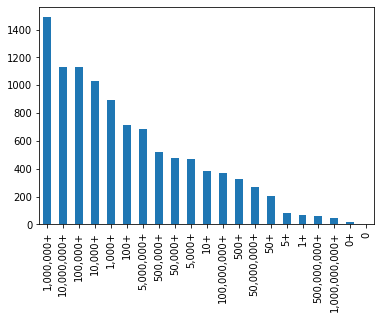

In [52]:
gps_new['Installs'].value_counts().plot(kind='bar')


In [53]:
#Remove + signe
gps_new['Installs'] = gps_new['Installs'].str.replace('[^0-9]+', '')
#Transform the column to numeric 
gps_new = gps_new.astype({'Installs':'float'})


/var/folders/l2/0xh36csd0pd8m1cg3531p7_w0000gn/T/ipykernel_61826/3835205951.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  gps_new['Installs'] = gps_new['Installs'].str.replace('[^0-9]+', '')


In [54]:
gps_new.Installs.value_counts()

1.000000e+06    1488
1.000000e+07    1132
1.000000e+05    1129
1.000000e+04    1033
1.000000e+03     892
1.000000e+02     713
5.000000e+06     683
5.000000e+05     517
5.000000e+04     474
5.000000e+03     471
1.000000e+01     386
1.000000e+08     369
5.000000e+02     328
5.000000e+07     272
5.000000e+01     205
5.000000e+00      82
1.000000e+00      67
5.000000e+08      61
1.000000e+09      49
0.000000e+00      15
Name: Installs, dtype: int64

In [55]:
np.corrcoef(gps_new['Installs'],gps_new['Rating'])

array([[1.        , 0.04711254],
       [0.04711254, 1.        ]])

## Visualization of Installs values

In [56]:
def visualize_deciles(df,col_name,quartiles):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots()
    df[col_name].hist(ax=ax, bins=20)
    for pos in quartiles:
        print(pos)
        handle = plt.axvline(pos, color='r')
    ax.legend([handle], ['quartiles'], fontsize=16)
    fig.set_size_inches(18.5, 10.5)
    ax.tick_params(labelsize=14)
    ax.set_xlabel('col_name', fontsize=14)
    ax.set_ylabel('Occurrence', fontsize=14)

In [57]:
quartiles = gps_new.Installs.quantile([ 0.1, 0.25, 0.5, 0.75])
quartiles


0.10        100.0
0.25       1000.0
0.50     100000.0
0.75    1000000.0
Name: Installs, dtype: float64

100.0
1000.0
100000.0
1000000.0


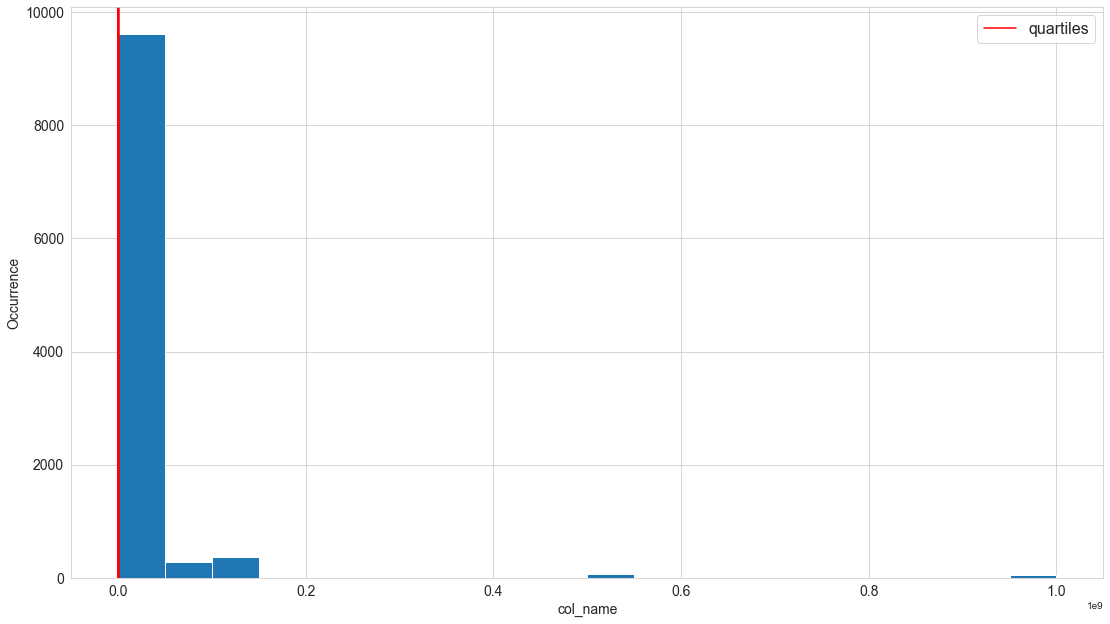

In [58]:
visualize_deciles(gps_new,'Installs',quartiles)

In [ ]:
#Log Installs

In [59]:
gps_new['log_Installs'] = np.log10(gps_new['Installs'] + 1)

quartiles = gps_new.log_Installs.quantile([ 0.1, 0.25, 0.5, 0.75])
# Visualize the deciles on the histogram


2.0043213737826426
3.000434077479319
5.000004342923105
6.0000004342942646


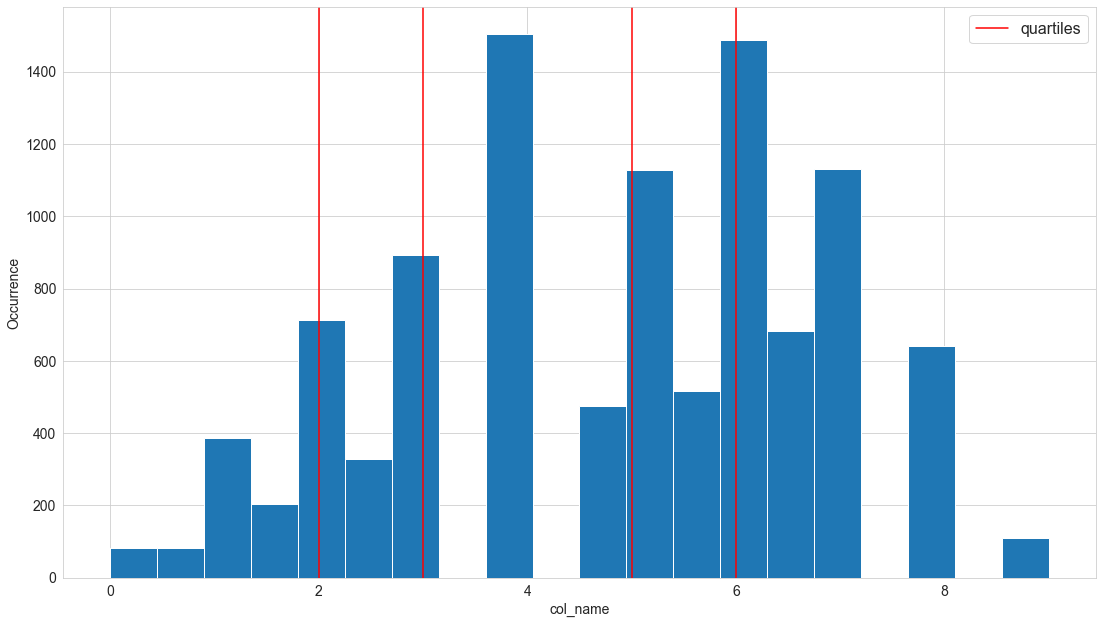

In [60]:
visualize_deciles(gps_new,'log_Installs',quartiles)

<AxesSubplot:>

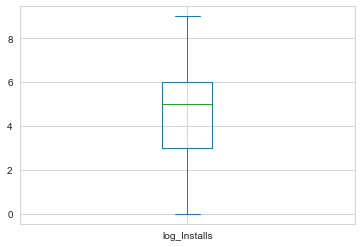

In [61]:
gps_new['log_Installs'].plot.box()

In [ ]:
'''
Quartiles values in **log_Installs column**
0.10    2.004321
0.25    3.000434
0.50    5.000004
0.75    6.000000


Quartiles values in **Installs column**
0.10        100.0
0.25       1000.0
0.50     100000.0
0.75    1000000.0

'''

Creating new classes for Intalls values:

In [62]:
gps_new['Installs_new_val'] = pd.cut(gps_new.Installs , 
                                     bins=[0.0, 1000.0, 100000.0, 1000000.0,10000000.0, 50000000000.0],
                                     labels=["Neg","MorThous","BTW^3-5", "BTW^5-6","More^7"],
                                     include_lowest=True)
gps_new.head() 

'''
Neg = Apps with negligible number of instalations from 0 to 1000 installation
MorThous = Apps with more than 1000 installation number
BTW^3-5 = Apps that have a nbr of installation between 10^3 and 10^5&more
BTW^5-6 = Apps that have a nbr of installation between 10^5-10^6&more
More^7 = Apps that have a nbr of installation more_than_10^7
'''


'\nNeg = Apps with negligible number of instalations from 0 to 1000 installation\nMorThous = Apps with more than 1000 installation number\nBTW^3-5 = Apps that have a nbr of installation between 10^3 and 10^5&more\nBTW^5-6 = Apps that have a nbr of installation between 10^5-10^6&more\nMore^7 = Apps that have a nbr of installation more_than_10^7\n'

In [63]:
gps_new.isnull().sum()


App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                1
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         8
Android Ver         2
log_Installs        0
Installs_new_val    0
dtype: int64

In [64]:
#To get the index of NaN values
#gps_new[gps_new['Installs_new_val'].isnull()].index.tolist()


<AxesSubplot:>

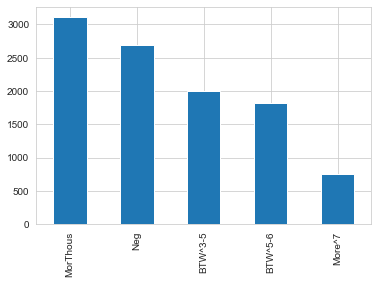

In [65]:
gps_new['Installs_new_val'].value_counts().plot(kind='bar')


In [ ]:
'''
Most of Apps have more than 1000 install, the second position are for Apps with nbr of install between 0 and 1000.


Almost same amount of Apps with nbr of install between 10^3-10^6 and more.


More than 500 Apps have a huge nbr of installation more than 10^7,

# Neg = "negligible"
# MorThous = 10^3&more
# BTW^3-5 = 10^3-10^5&more
# BTW^5-6 = 10^5-10^6&more
# More^7 =more_than_10^7
'''

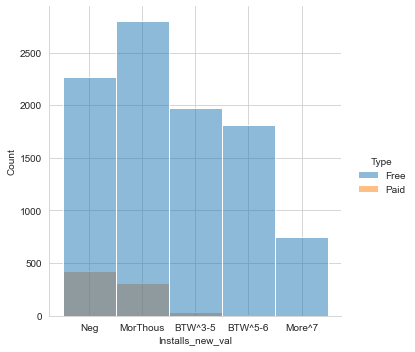

In [66]:
#Installation vs Type(Paid or Free)
sns.displot(gps_new, x="Installs_new_val", hue= "Type")

We clearly see that the most popular app (most installed) are free, the big amount of paid App are negligible.


<AxesSubplot:xlabel='Rating', ylabel='Installs_new_val'>

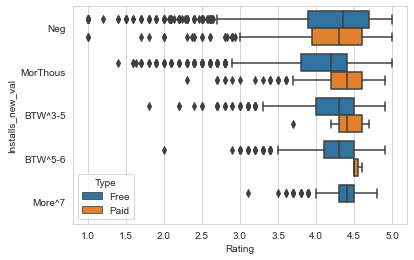

In [67]:
sns.boxplot(x='Rating', y= 'Installs_new_val',hue='Type', data=gps_new)


Most of the important App (with important installation number) have a good rating between 3 to 5, with median around 4.5

In [ ]:
#sns.displot(gps_new, x="Rating", y="Reviews", hue="Type", kind="kde", rug= True)


In order to apply some classification algorithmes, let's join (inner join) our 2 tables, gps_new and gps_user_rev, with respect to the column App.


In [68]:
gps_new.App.value_counts()

ROBLOX                                             9
8 Ball Pool                                        7
Zombie Catchers                                    6
Helix Jump                                         6
Bubble Shooter                                     6
                                                  ..
Pureness Pacify (Android P) - Theme for Xperia™    1
Android P 9.0                                      1
P Theme for Android™ P 9.0 Style Launcher          1
Theme Android P Black for LG G7 & V35              1
iHoroscope - 2018 Daily Horoscope & Astrology      1
Name: App, Length: 9659, dtype: int64

In [69]:
gps_user_rev.App.value_counts()

Facebook                                              116
Angry Birds Classic                                   107
Episode - Choose Your Story                           107
Google Photos                                         100
ColorNote Notepad Notes                                99
                                                     ... 
Caller ID +                                             1
CallApp: Caller ID, Blocker & Phone Call Recorder       1
Calendar+ Schedule Planner App                          1
Calculator - unit converter                             1
Best Ovulation Tracker Fertility Calendar App Glow      1
Name: App, Length: 865, dtype: int64

In [70]:
#Checking If Two Dataframes have the Exactly Same column App
gps_new['App'].equals(gps_user_rev['App'])  

False

In [71]:
print(gps_new.shape)
print(gps_user_rev.shape)

(10366, 15)
(25084, 4)


In [ ]:
#Dib Part

In [ ]:
#gps_user_rev_dap.groupby(['App','Sentiment']).agg({'Sentiment_Polarity':['mean','min','max']})
#df = gps_user_rev_dap.groupby(['App','Sentiment']).agg({'Sentiment_Subjectivity':['mean','std'],
 #                                                  'Sentiment_Polarity':['mean','min','max']})
df = gps_user_rev.groupby(['App','Sentiment']).agg({'Sentiment_Subjectivity':'mean',
                                                   'Sentiment_Polarity':'mean'})

df

In [ ]:
#Check the Indexes
#df.index

In [ ]:
#Check the column's name
#df.columns

In [ ]:
# Droping the unnecessary column
df2 = gps_new.drop(['Installs','Price','Genres','Last Updated','Current Ver','Android Ver','log_Installs','Content Rating'], axis=1)
df2.head()

In [ ]:
#df3 = df2.groupby(['App','Category','Type']).agg({'Rating':'mean',
#                                                  'Reviews':'mean'
 #                                               })
df3 = df2.groupby(['App','Installs_new_val','Size','Type']).agg({'Rating':'mean',
                                                                 'Reviews':'mean'})
df3

In [ ]:
df3.reset_index()

In [ ]:
df3.dropna(axis=0, inplace=True)

In [ ]:
dfinal = df.reset_index().merge(df3.reset_index(), how='inner', on='App')
dfinal

In [ ]:
#2nd method


In [ ]:
#First let's try to eliminate some features

In [72]:
gps_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs,Installs_new_val
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.000043,MorThous
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.698971,BTW^3-5


In [ ]:
#Genres vs Category

In [73]:
cross = pd.crosstab(gps_new['Category'], gps_new['Genres'])
test = stats.chi2_contingency(cross)
alpha = 0.05
if test[1] <= alpha:
    print('Category and Genres are related')
else:
    print('No evidence of relation between Category & Genres ')


Category and Genres are related


In [ ]:
#Size vs Installs

In [74]:
#gps_user_rev, gps_new
df2 = gps_new.drop(['Installs','Price','Genres','Last Updated','Current Ver','Android Ver','log_Installs','Content Rating'], axis=1)
df2.head()

,App,Category,Rating,Reviews,Size,Type,Installs_new_val
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,MorThous
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,Free,BTW^3-5
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87,Free,BTW^5-6
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,More^7
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28,Free,MorThous


In [75]:
gps_user_rev.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
6,10 Best Foods for You,Positive,0.60,0.900000


In [80]:
dffinal = gps_user_rev.merge(df2, how='inner', on='App')
dffinal

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Type,Installs_new_val
0,10 Best Foods for You,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,38,Free,BTW^3-5
1,10 Best Foods for You,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,38,Free,BTW^3-5
2,10 Best Foods for You,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490,38,Free,BTW^3-5
3,10 Best Foods for You,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,38,Free,BTW^3-5
4,10 Best Foods for You,Positive,0.600000,0.900000,HEALTH_AND_FITNESS,4.0,2490,38,Free,BTW^3-5
...,...,...,...,...,...,...,...,...,...,...
35163,Housing-Real Estate & Property,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301,,Free,BTW^3-5
35164,Housing-Real Estate & Property,Positive,0.225000,0.447222,LIFESTYLE,4.1,28301,,Free,BTW^3-5
35165,Housing-Real Estate & Property,Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301,,Free,BTW^3-5
35166,Housing-Real Estate & Property,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301,,Free,BTW^3-5


In [81]:
grouped_df = dffinal.groupby(['App','Sentiment','Type','Installs_new_val','Category']).agg({'Sentiment_Subjectivity':'mean',
                                                                                           'Sentiment_Polarity':'mean',
                                                                                           'Rating':'mean',
                                                                                           'Reviews':'mean'})

grouped_df

Sentiment_Subjectivity  \
App                            Sentiment Type Installs_new_val Category                                      
10 Best Foods for You          Negative  Free Neg              ART_AND_DESIGN                          NaN   
                                                               AUTO_AND_VEHICLES                       NaN   
                                                               BEAUTY                                  NaN   
                                                               BOOKS_AND_REFERENCE                     NaN   
                                                               BUSINESS                                NaN   
...                                                                                                    ...   
Housing-Real Estate & Property Positive  Paid More^7           SPORTS                                  NaN   
                                                               TOOLS                                   NaN   
                                                               TRAVEL_AND_LOCAL                        NaN   
                                                               VIDEO_PLAYERS                           NaN   
                                                               WEATHER                                 NaN   

                                                                                    Sentiment_Polarity  \
App                            Sentiment Type Installs_new_val Category                                  
10 Best Foods for You          Negative  Free Neg              ART_AND_DESIGN                      NaN   
                                                               AUTO_AND_VEHICLES                   NaN   
                                                               BEAUTY                              NaN   
                                                               BOOKS_AND_REFERENCE                 NaN   
                                                               BUSINESS                            NaN   
...                                                                                                ...   
Housing-Real Estate & Property Positive  Paid More^7           SPORTS                              NaN   
                                                               TOOLS                               NaN   
                                                               TRAVEL_AND_LOCAL                    NaN   
                                                               VIDEO_PLAYERS                       NaN   
                                                               WEATHER                             NaN   

                                                                                    Rating  \
App                            Sentiment Type Installs_new_val Category                      
10 Best Foods for You          Negative  Free Neg              ART_AND_DESIGN          NaN   
                                                               AUTO_AND_VEHICLES       NaN   
                                                               BEAUTY                  NaN   
                                                               BOOKS_AND_REFERENCE     NaN   
                                                               BUSINESS                NaN   
...                                                                                    ...   
Housing-Real Estate & Property Positive  Paid More^7           SPORTS                  NaN   
                                                               TOOLS                   NaN   
                                                               TRAVEL_AND_LOCAL        NaN   
                                                               VIDEO_PLAYERS           NaN   
                                                               WEATHER                 NaN   

                                                   

In [82]:
grouped_df.dropna(axis=0, inplace=True)
grouped_df

Sentiment_Subjectivity  \
App                            Sentiment Type Installs_new_val Category                                     
10 Best Foods for You          Negative  Free BTW^3-5          HEALTH_AND_FITNESS                0.443750   
                               Neutral   Free BTW^3-5          HEALTH_AND_FITNESS                0.000000   
                               Positive  Free BTW^3-5          HEALTH_AND_FITNESS                0.576849   
11st                           Negative  Free BTW^5-6          SHOPPING                          0.435615   
                               Neutral   Free BTW^5-6          SHOPPING                          0.444444   
...                                                                                                   ...   
Hotwire Hotel & Car Rental App Neutral   Free BTW^3-5          TRAVEL_AND_LOCAL                  0.259375   
                               Positive  Free BTW^3-5          TRAVEL_AND_LOCAL                  0.593508   
Housing-Real Estate & Property Negative  Free BTW^3-5          LIFESTYLE                         0.391038   
                               Neutral   Free BTW^3-5          LIFESTYLE                         0.000000   
                               Positive  Free BTW^3-5          LIFESTYLE                         0.528727   

                                                                                   Sentiment_Polarity  \
App                            Sentiment Type Installs_new_val Category                                 
10 Best Foods for You          Negative  Free BTW^3-5          HEALTH_AND_FITNESS           -0.456250   
                               Neutral   Free BTW^3-5          HEALTH_AND_FITNESS            0.000000   
                               Positive  Free BTW^3-5          HEALTH_AND_FITNESS            0.540442   
11st                           Negative  Free BTW^5-6          SHOPPING                     -0.336458   
                               Neutral   Free BTW^5-6          SHOPPING                      0.000000   
...                                                                                               ...   
Hotwire Hotel & Car Rental App Neutral   Free BTW^3-5          TRAVEL_AND_LOCAL              0.000000   
                               Positive  Free BTW^3-5          TRAVEL_AND_LOCAL              0.479520   
Housing-Real Estate & Property Negative  Free BTW^3-5          LIFESTYLE                    -0.319918   
                               Neutral   Free BTW^3-5          LIFESTYLE                     0.000000   
                               Positive  Free BTW^3-5          LIFESTYLE                     0.366162   

                                                                                   Rating  \
App                            Sentiment Type Installs_new_val Category                     
10 Best Foods for You          Negative  Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
                               Neutral   Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
                               Positive  Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
11st                           Negative  Free BTW^5-6          SHOPPING               3.8   
                               Neutral   Free BTW^5-6          SHOPPING               3.8   
...                                                                                   ...   
Hotwire Hotel & Car Rental App Neutral   Free BTW^3-5          TRAVEL_AND_LOCAL       4.3   
                               Positive  Free BTW^3-5          TRAVEL_AND_LOCAL       4.3   
Housing-Real Estate & Property Negative  Free BTW^3-5          LIFESTYLE              4.1   
                               Neutral   Free BTW^3-5          LIFESTYLE              4.1   
                               Positive  Free BTW^3-5          LIFESTYLE              4.1   

                                                                                         

In [83]:
grouped_df.reset_index()
grouped_df.head(6)

Sentiment_Subjectivity  \
App                   Sentiment Type Installs_new_val Category                                     
10 Best Foods for You Negative  Free BTW^3-5          HEALTH_AND_FITNESS                0.443750   
                      Neutral   Free BTW^3-5          HEALTH_AND_FITNESS                0.000000   
                      Positive  Free BTW^3-5          HEALTH_AND_FITNESS                0.576849   
11st                  Negative  Free BTW^5-6          SHOPPING                          0.435615   
                      Neutral   Free BTW^5-6          SHOPPING                          0.444444   
                      Positive  Free BTW^5-6          SHOPPING                          0.551349   

                                                                          Sentiment_Polarity  \
App                   Sentiment Type Installs_new_val Category                                 
10 Best Foods for You Negative  Free BTW^3-5          HEALTH_AND_FITNESS           -0.456250   
                      Neutral   Free BTW^3-5          HEALTH_AND_FITNESS            0.000000   
                      Positive  Free BTW^3-5          HEALTH_AND_FITNESS            0.540442   
11st                  Negative  Free BTW^5-6          SHOPPING                     -0.336458   
                      Neutral   Free BTW^5-6          SHOPPING                      0.000000   
                      Positive  Free BTW^5-6          SHOPPING                      0.363525   

                                                                          Rating  \
App                   Sentiment Type Installs_new_val Category                     
10 Best Foods for You Negative  Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
                      Neutral   Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
                      Positive  Free BTW^3-5          HEALTH_AND_FITNESS     4.0   
11st                  Negative  Free BTW^5-6          SHOPPING               3.8   
                      Neutral   Free BTW^5-6          SHOPPING               3.8   
                      Positive  Free BTW^5-6          SHOPPING               3.8   

                                                                                Reviews  
App                   Sentiment Type Installs_new_val Category                           
10 Best Foods for You Negative  Free BTW^3-5          HEALTH_AND_FITNESS   6.225623e+14  
                      Neutral   Free BTW^3-5          HEALTH_AND_FITNESS   2.490000e+03  
                      Positive  Free BTW^3-5          HEALTH_AND_FITNESS  4.220761e+233  
11st                  Negative  Free BTW^5-6          SHOPPING             6.961784e+33  
                      Neutral   Free BTW^5-6          SHOPPING             1.624416e+14  
                      Positive  Free BTW^5-6          SHOPPING             2.564868e+93

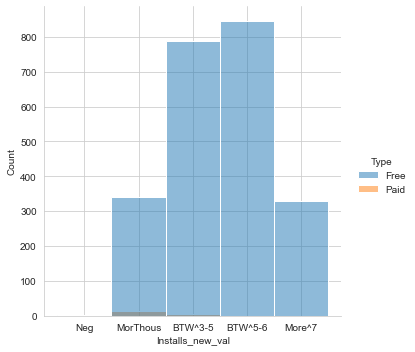

In [84]:
sns.displot(grouped_df, x="Installs_new_val", hue= "Type")

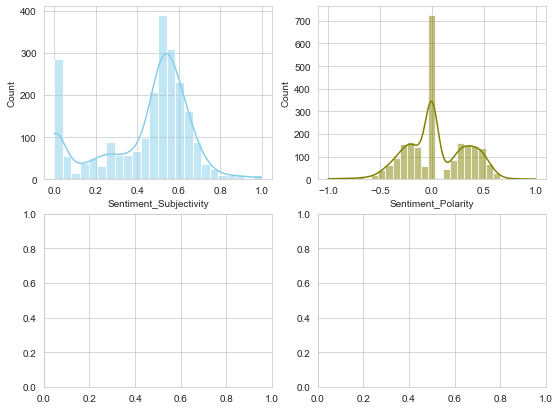

In [85]:


fig, axs = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(data=grouped_df, x="Sentiment_Subjectivity", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=grouped_df, x="Sentiment_Polarity", kde=True, color="olive", ax=axs[0, 1])

plt.show()



Sentiment_Polarity appear to have a bimodal distribution. 

Let's check the joint distribution of Sentiment_Polarity and Sentiment_Subjectivity.

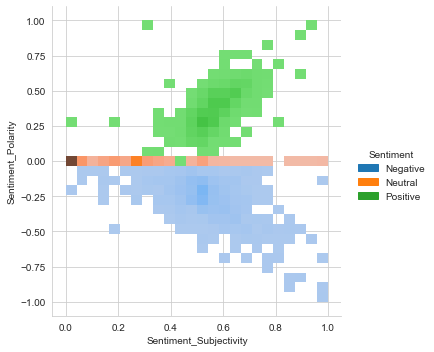

In [86]:
sns.displot(grouped_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue= 'Sentiment')

There are a clear separation between positive and negative opinion, hence the bimodality of the distribution of Sentiment_Polarity.
(Negative reviews has a negative Sentiment_Polarity and Positive revious has a positive Sentiment_Polarity).
Most of the positive reviews are quite subjective (Sentiment_Subjectivity btween [0.4,0.8]), 
but the Negative comments have more subjectivity (people are given more subjective reason on why the don't like the App) 


/Users/hocine/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


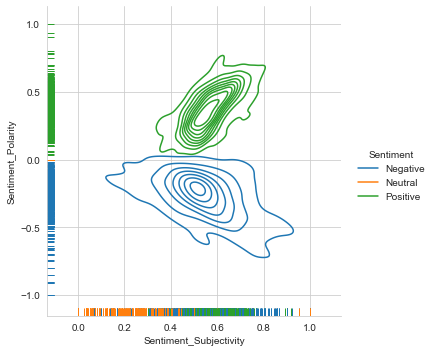

In [87]:
sns.displot(grouped_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Sentiment', kind="kde", rug= True)


We can clearly see that Sentiment_Subjectivity of both Positive and Negative group have most values higher than 0.4 and less than 0.8

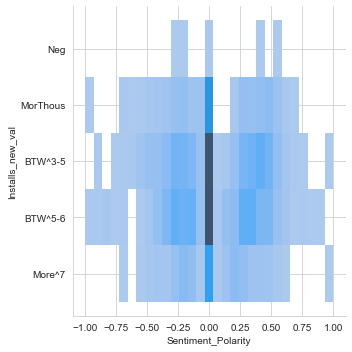

In [88]:
sns.displot(grouped_df, x="Sentiment_Polarity", y="Installs_new_val")


In [ ]:
sns.displot(grouped_df, x="Sentiment_Polarity", hue="Category")


In [ ]:
sns.displot(grouped_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Installs_new_val', kind="kde", rug= True)


In [ ]:
sns.displot(grouped_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Category', kind="kde", rug= True)
